K++ means clustering

In [1]:
#dataset creation
import numpy as np
import matplotlib.pyplot as plt

mean_01 = np.array([0.0, 0.0])
cov_01 = np.array([[1, 0.3], [0.3, 1]])
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 100)

mean_02 = np.array([6.0, 7.0])
cov_02 = np.array([[1.5, 0.3], [0.3, 1]])
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 100)

mean_03 = np.array([7.0, -5.0])
dist_03 = np.random.multivariate_normal(mean_03, cov_01, 100)

mean_04 = np.array([2.0, -7.0])
cov_04 = np.array([[1.2, 0.5], [0.5, 1.3]])
dist_04 = np.random.multivariate_normal(mean_04, cov_01, 100)

data = np.vstack((dist_01, dist_02, dist_03, dist_04))
np.random.shuffle(data)

In [2]:
#plotting helper function
def plot(data, centroids):
    plt.scatter(data[:, 0], data[:, 1], marker='.', color='gray', label='Data Points')
    if centroids.shape[0] > 1:
        plt.scatter(centroids[:-1, 0], centroids[:-1, 1], color='black', label='Selected Centroids')
    plt.scatter(centroids[-1, 0], centroids[-1, 1], color='red', label='Next Centroid')
    plt.title(f'Select {centroids.shape[0]}th Centroid')
    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()

In [3]:
#eucledian deistance function
def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

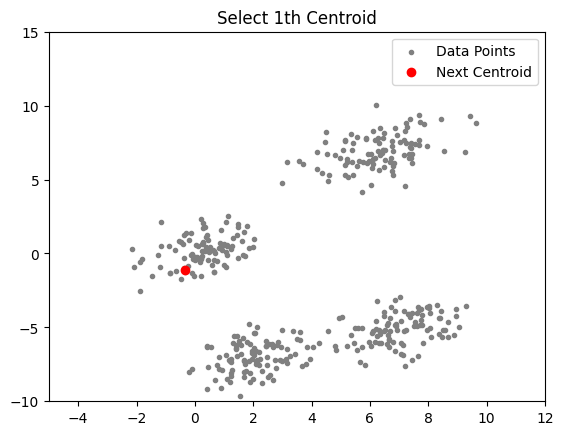

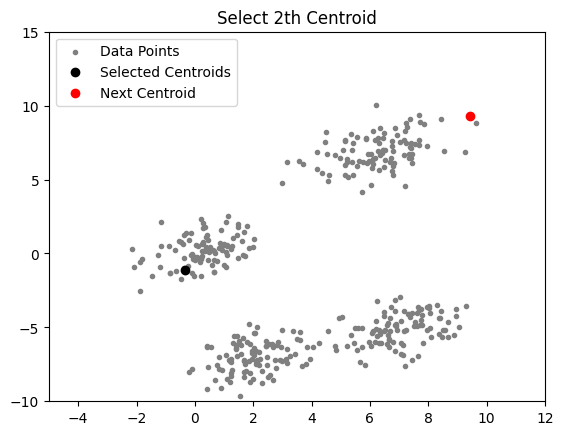

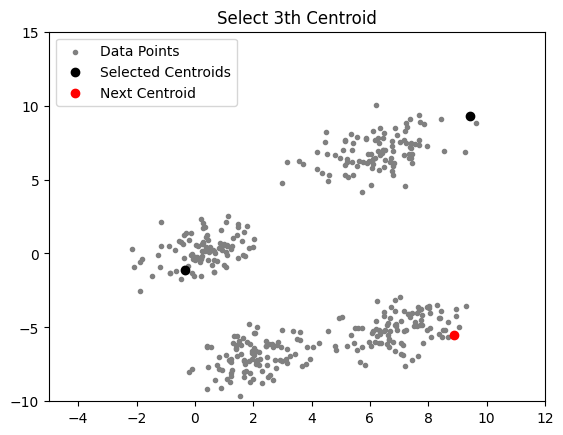

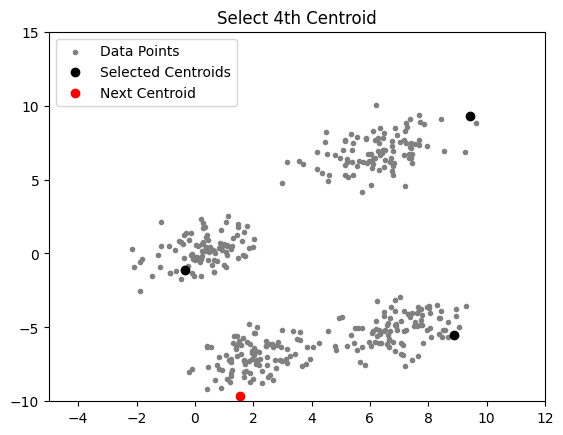

In [4]:
#k_means++ intialisation
import sys

def initialize(data, k):
    centroids = []
    centroids.append(data[np.random.randint(data.shape[0])])
    plot(data, np.array(centroids))

    for _ in range(k - 1):
        distances = []
        for point in data:
            min_dist = min([distance(point, c) for c in centroids])
            distances.append(min_dist)

        next_centroid = data[np.argmax(distances)]
        centroids.append(next_centroid)
        plot(data, np.array(centroids))

    return np.array(centroids)

# Run initialization
centroids = initialize(data, k=4)

k-mode clustering

In [5]:
#preparing dataset
import numpy as np
import pandas as pd

data = np.array([
    ['A', 'B', 'C'],
    ['B', 'C', 'A'],
    ['C', 'A', 'B'],
    ['A', 'C', 'B'],
    ['A', 'A', 'B']
])

In [6]:
#setting number of clusters
k=2

In [7]:
#pick starting points
np.random.seed(0)
modes = data[np.random.choice(data.shape[0], k, replace=False)]

In [8]:
#assign data to clusters
clusters = np.zeros(data.shape[0], dtype=int)

for _ in range(10):
    for i, point in enumerate(data):
        distances = [np.sum(point != mode) for mode in modes]
        clusters[i] = np.argmin(distances)

In [9]:
#results
print("Cluster assignments:", clusters)
print("Cluster modes:", modes)

Cluster assignments: [1 0 0 0 0]
Cluster modes: [['C' 'A' 'B']
 ['A' 'B' 'C']]


clustering with k-mode library


In [10]:
pip install kmodes

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 7.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 4.0
Run 1, iteration: 2/100, moves: 0, cost: 4.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1, cost: 4.0
Run 2, iteration: 2/100, moves: 0, cost: 4.0
Init: initial

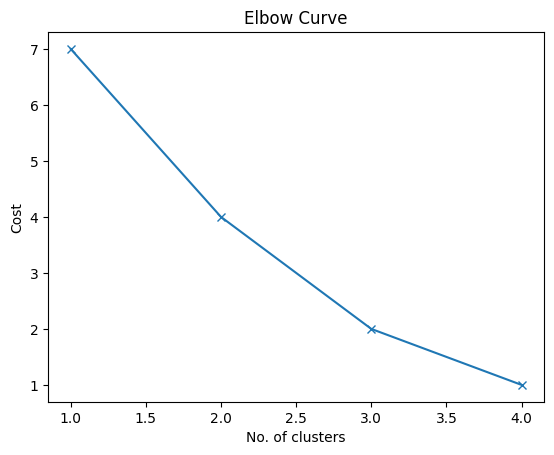

In [11]:
import pandas as pd
import numpy as np
# !pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

cost = []
K = range(1,5)
for k in list(K):
    kmode = KModes(n_clusters=k, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'x-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Curve')
plt.show()

In [12]:
kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 5.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1, cost: 4.0
Run 2, iteration: 2/100, moves: 0, cost: 4.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2, cost: 5.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 5.0
Best run was number 2


array([0, 1, 0, 0, 0], dtype=uint16)

Fuzzy clustering

In [15]:
import numpy as np

import matplotlib.pyplot as plt

In [14]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 39.5 MB/s eta 0:00:00


In [16]:
np.random.seed(0)
center = 0.5
spread = 0.1

data = center + spread * np.random.randn(2, 100)

data = np.clip(data, 0, 1)

In [17]:
#setting up parameters
n_clusters = 3
m = 1.7
error = 1e-5
maxiter = 2000

In [19]:
import skfuzzy as fuzz

cntr, u, _, _, _, _, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=m, error=error, maxiter=maxiter, init=None
)

hard_clusters = np.argmax(u, axis=0)

In [20]:
print("Cluster Centers:\n", cntr)
print("\nFuzzy Membership Matrix (first 5 data points):")
print(u[:, :5])

Cluster Centers:
 [[0.40427944 0.44688713]
 [0.57608357 0.43108734]
 [0.53151692 0.61555506]]

Fuzzy Membership Matrix (first 5 data points):
[[0.0753945  0.103008   0.03041289 0.09668828 0.07004986]
 [0.16579475 0.86917327 0.95209853 0.36321813 0.85265308]
 [0.75881075 0.02781873 0.01748858 0.54009359 0.07729706]]


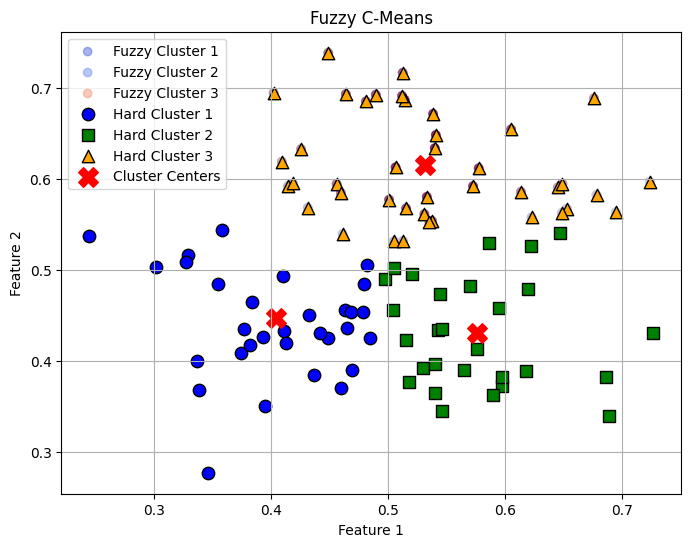

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(n_clusters):
    ax.scatter(data[0], data[1], c=u[i], cmap='coolwarm',
               alpha=0.5, label=f'Fuzzy Cluster {i+1}')

markers = ['o', 's', '^']
colors = ['blue', 'green', 'orange']
for i in range(n_clusters):
    cluster_points = data[:, hard_clusters == i]
    ax.scatter(cluster_points[0], cluster_points[1], c=colors[i],
               marker=markers[i], edgecolor='k', s=80, label=f'Hard Cluster {i+1}')

ax.scatter(cntr[:, 0], cntr[:, 1], c='red',
           marker='X', s=200, label='Cluster Centers')

ax.set_title('Fuzzy C-Means')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend(loc='upper left')
plt.grid(True)
plt.show()